# Setup
Here are all the Packages I use. If you don't have them already set up in your environment, you may have to do a `Pkg.add`

In [1]:
using DataFrames, CSV

In [2]:
using Statistics

In [3]:
using StatsBase

In [4]:
# for histogram()
using StatsPlots

In [5]:
using Plots.PlotMeasures

In [6]:
gr()

Plots.GRBackend()

In [7]:
using Dates

In [8]:
ENV["LINES"] = 72

72

In [9]:
ENV["COLUMNS"] = 90

90

## Helper functions

In [10]:
# calculate new cases by subtracting prior count; shifts back time array by one day
function newcases(a)
    nc = Array{Int64,1}()
    for i in 1:length(a) - 1
        push!(nc, a[i+1] - a[i])
    end
    return nc
end

newcases (generic function with 1 method)

In [11]:
# smooth a time series using an odd sized window; will decrease the time array half the window length off the front and back
function smooth(a, ws)
    if iseven(ws) error("even window for smoothing"); end
    sa = Array{Float64,1}()
    for i in 1:length(a) - ws + 1
        push!(sa, mean(a[i:i+ws-1]))
    end
    return sa
end

smooth (generic function with 1 method)

In [12]:
# to make plotting log scale easier
logprotect(a) = [max(1, x) for x in a]

logprotect (generic function with 1 method)

# Johns Hopkins Data
This is the Covid-19 data made available by Johns Hopkins. You can download from https://github.com/CSSEGISandData/COVID-19

I am only parsing the daily time series summary tables, including confirmed, deaths and recovered. All those data come from the daily case report.

Field description
* Province/State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.
* Country/Region: country/region name conforming to WHO (will be updated).
* Lat and Long: a coordinates reference for the user.
* Date fields: M/DD/YYYY (UTC), the same data as MM-DD-YYYY.csv file.



In [13]:
# get the latest using GitHub
import GitHub
import Base64

In [14]:
filelist = map(x->x.name, GitHub.directory("CSSEGISandData/COVID-19", "csse_covid_19_data/csse_covid_19_time_series/")[1])[3:end]

6-element Array{String,1}:
 "README.md"
 "time_series_covid19_confirmed_US.csv"
 "time_series_covid19_confirmed_global.csv"
 "time_series_covid19_deaths_US.csv"
 "time_series_covid19_deaths_global.csv"
 "time_series_covid19_recovered_global.csv"

In [15]:
# update files from GitHub
@time for fn in filelist
    open(fn, "w") do f
        write(f, String(Base64.base64decode(
                    GitHub.file("CSSEGISandData/COVID-19", "csse_covid_19_data/csse_covid_19_time_series/" * fn).content)))
    end
end

 14.896713 seconds (717.73 k allocations: 43.844 MiB, 0.11% gc time)


## US confirmed cases

In [16]:
@time usconf = CSV.read("time_series_covid19_confirmed_US.csv")

  4.330409 seconds (7.84 M allocations: 375.029 MiB, 3.31% gc time)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region
,Int64,String,String,Int64,Float64⍰,String⍰,String,String
1,16,AS,ASM,16,60.0,missing,American Samoa,US
2,316,GU,GUM,316,66.0,missing,Guam,US
3,580,MP,MNP,580,69.0,missing,Northern Mariana Islands,US
4,630,PR,PRI,630,72.0,missing,Puerto Rico,US
5,850,VI,VIR,850,78.0,missing,Virgin Islands,US
6,84001001,US,USA,840,1001.0,Autauga,Alabama,US
7,84001003,US,USA,840,1003.0,Baldwin,Alabama,US
8,84001005,US,USA,840,1005.0,Barbour,Alabama,US
9,84001007,US,USA,840,1007.0,Bibb,Alabama,US


In [17]:
describe(usconf)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,UID,8.39031e7,16,8.403e7,84099999
2,iso2,,AS,,VI
3,iso3,,ASM,,VIR
4,code3,839.445,16,840.0,850
5,FIPS,32090.9,60.0,30045.0,99999.0
6,Admin2,,Abbeville,,Ziebach
7,Province_State,,Alabama,,Wyoming
8,Country_Region,,US,,US
9,Lat,37.1609,-14.271,38.1472,69.3148


In [18]:
confdaterange = 12:length(names(usconf)[12:end]) + 12 -1

12:98

In [19]:
# create an Array of Date for xaxis plotting
@time datelist = Date.(string.(names(usconf)[confdaterange]), "m/dd/yy") .+ Year(2000)

  0.506850 seconds (1.22 M allocations: 61.340 MiB, 4.06% gc time)


87-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 2020-02-04
 2020-02-05
 2020-02-06
 2020-02-07
 2020-02-08
 2020-02-09
 2020-02-10
 2020-02-11
 2020-02-12
 2020-02-13
 2020-02-14
 2020-02-15
 2020-02-16
 2020-02-17
 2020-02-18
 2020-02-19
 2020-02-20
 2020-02-21
 2020-02-22
 2020-02-23
 2020-02-24
 ⋮
 2020-03-16
 2020-03-17
 2020-03-18
 2020-03-19
 2020-03-20
 2020-03-21
 2020-03-22
 2020-03-23
 2020-03-24
 2020-03-25
 2020-03-26
 2020-03-27
 2020-03-28
 2020-03-29
 2020-03-30
 2020-03-31
 2020-04-01
 2020-04-02
 2020-04-03
 2020-04-04
 2020-04-05
 2020-04-06
 2020-04-07
 2020-04-08
 2020-04-09
 2020-04-10
 2020-04-11
 2020-04-12
 2020-04-13
 2020-04-14
 2020-04-15
 2020-04-16
 2020-04-17

In [20]:
# Array of State names as String
states = unique(usconf.Province_State)

58-element Array{String,1}:
 "American Samoa"
 "Guam"
 "Northern Mariana Islands"
 "Puerto Rico"
 "Virgin Islands"
 "Alabama"
 "Alaska"
 "Arizona"
 "Arkansas"
 "California"
 "Colorado"
 "Connecticut"
 "Delaware"
 "District of Columbia"
 "Florida"
 "Georgia"
 "Hawaii"
 "Idaho"
 "Illinois"
 "Indiana"
 "Iowa"
 "Kansas"
 "Kentucky"
 "Louisiana"
 "Maine"
 "Maryland"
 "Massachusetts"
 "Michigan"
 "Minnesota"
 "Mississippi"
 "Missouri"
 "Montana"
 "Nebraska"
 "Nevada"
 "New Hampshire"
 "New Jersey"
 "New Mexico"
 "New York"
 "North Carolina"
 "North Dakota"
 "Ohio"
 "Oklahoma"
 "Oregon"
 "Pennsylvania"
 "Rhode Island"
 "South Carolina"
 "South Dakota"
 "Tennessee"
 "Texas"
 "Utah"
 "Vermont"
 "Virginia"
 "Washington"
 "West Virginia"
 "Wisconsin"
 "Wyoming"
 "Diamond Princess"
 "Grand Princess"

## US death

In [21]:
@time usdeath = CSV.read("time_series_covid19_deaths_US.csv")

  0.007798 seconds (2.95 k allocations: 5.919 MiB)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region
,Int64,String,String,Int64,Float64⍰,String⍰,String,String
1,16,AS,ASM,16,60.0,missing,American Samoa,US
2,316,GU,GUM,316,66.0,missing,Guam,US
3,580,MP,MNP,580,69.0,missing,Northern Mariana Islands,US
4,630,PR,PRI,630,72.0,missing,Puerto Rico,US
5,850,VI,VIR,850,78.0,missing,Virgin Islands,US
6,84001001,US,USA,840,1001.0,Autauga,Alabama,US
7,84001003,US,USA,840,1003.0,Baldwin,Alabama,US
8,84001005,US,USA,840,1005.0,Barbour,Alabama,US
9,84001007,US,USA,840,1007.0,Bibb,Alabama,US


In [22]:
describe(usdeath)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,UID,8.39031e7,16,8.403e7,84099999
2,iso2,,AS,,VI
3,iso3,,ASM,,VIR
4,code3,839.445,16,840.0,850
5,FIPS,32090.9,60.0,30045.0,99999.0
6,Admin2,,Abbeville,,Ziebach
7,Province_State,,Alabama,,Wyoming
8,Country_Region,,US,,US
9,Lat,37.1609,-14.271,38.1472,69.3148


In [23]:
deathdaterange = 13:length(names(usdeath)[13:end]) + 13 -1

13:99

## organize data by state

In [24]:
# create a dataframe to organize statistics with State for each row
@time statereports = DataFrame(state = states)
stateconfirm = Dict{String, Vector{Int}}()
statedeath = Dict{String, Vector{Int}}()
statereports.confirm1 = fill(Date(1), length(states))
statereports.confirm2 = fill(Date(1), length(states))
statereports.confirm5 = fill(Date(1), length(states))
statereports.confirmlast = zeros(Int64, length(states))
statereports.death1 = fill(Date(1), length(states))
statereports.death2 = fill(Date(1), length(states))
statereports.death5 = fill(Date(1), length(states))
statereports.deathlast = zeros(Int64, length(states))
statereports.pop = zeros(Int64, length(states))
statereports.maxnewconfirm = fill(Date(1), length(states))
statereports.maxnewdeath = fill(Date(1), length(states))

  0.057507 seconds (81.86 k allocations: 4.165 MiB)


58-element Array{Date,1}:
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01

In [25]:
# populate statereports and sum data for each State for each day
@time for (i, s) in enumerate(states)
    stateconfirm[s] = sum.(eachcol(groupby(usconf, :Province_State)[i][:, confdaterange]))
    statedeath[s] = sum.(eachcol(groupby(usdeath, :Province_State)[i][:, deathdaterange]))
    fd = findfirst(x->x>0, stateconfirm[s])
    if fd != nothing statereports.confirm1[i] = datelist[fd]; end
    fd = findfirst(x->x>1, stateconfirm[s])
    if fd != nothing statereports.confirm2[i] = datelist[fd]; end
    fd = findfirst(x->x>4, stateconfirm[s])
    if fd != nothing statereports.confirm5[i] = datelist[fd]; end
    statereports.confirmlast[i] = stateconfirm[s][end]
    fd = findfirst(x->x>0, statedeath[s])
    if fd != nothing statereports.death1[i] = datelist[fd]; end
    fd = findfirst(x->x>1, statedeath[s])
    if fd != nothing statereports.death2[i] = datelist[fd]; end
    fd = findfirst(x->x>4, statedeath[s])
    if fd != nothing statereports.death5[i] = datelist[fd]; end
    statereports.deathlast[i] = statedeath[s][end]
    statereports.pop[i] = sum(groupby(usdeath, :Province_State)[i].Population)
    a = newcases(stateconfirm[s])
    a1 = findfirst(x->x==maximum(a), a)
    statereports.maxnewconfirm[i] = datelist[2:end][a1 + div(findlast(x->x==maximum(a), a) - a1, 2)]
    a = newcases(statedeath[s])
    a1 = findfirst(x->x==maximum(a), a)
    statereports.maxnewdeath[i] = datelist[2:end][a1 + div(findlast(x->x==maximum(a), a) - a1, 2)]
end

  1.837355 seconds (5.72 M allocations: 298.537 MiB, 5.90% gc time)


  8.323108 seconds (14.88 M allocations: 735.539 MiB, 6.45% gc time)
  0.308157 seconds (1.57 M allocations: 74.837 MiB, 8.75% gc time)


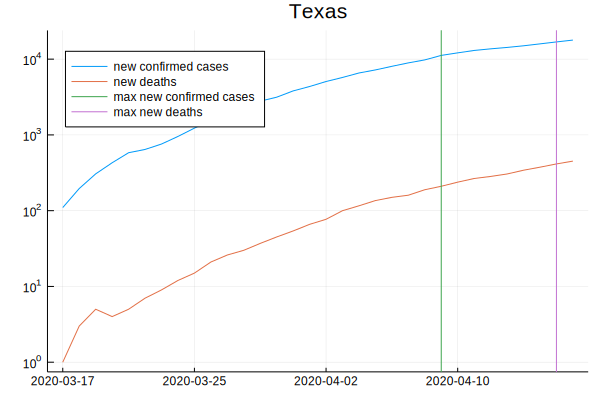

In [26]:
# log raw plot starting with first death
si = findfirst(x->x=="Texas", states)
di = findfirst(x->x==statereports.death1[findfirst(x->x=="Texas", states)], datelist)
@time plot(datelist[di:end], stateconfirm["Texas"][di:end], title="Texas", label="new confirmed cases", legend=:topleft, yaxis=:log)
@time plot!(datelist[di:end], statedeath["Texas"][di:end], title="Texas", label="new deaths")
vline!([statereports.maxnewconfirm[si]], label="max new confirmed cases")
vline!([statereports.maxnewdeath[si]], label="max new deaths")

  0.023788 seconds (63.96 k allocations: 2.957 MiB)
  0.000607 seconds (1.64 k allocations: 99.164 KiB)


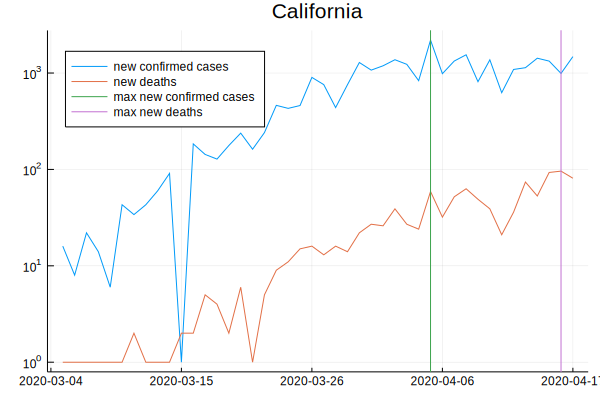

In [27]:
# log new cases plot starting with first death
si = findfirst(x->x=="California", states)
di = findfirst(x->x==statereports.death1[si], datelist)
@time plot(datelist[di+1:end], logprotect(newcases(stateconfirm["California"][di:end])), title="California", label="new confirmed cases", legend=:topleft, yaxis=:log)
@time plot!(datelist[di+1:end], logprotect(newcases(statedeath["California"][di:end])), title="California", label="new deaths")
vline!([statereports.maxnewconfirm[si]], label="max new confirmed cases")
vline!([statereports.maxnewdeath[si]], label="max new deaths")

  0.036777 seconds (66.02 k allocations: 3.155 MiB)
  0.000804 seconds (1.64 k allocations: 98.320 KiB)


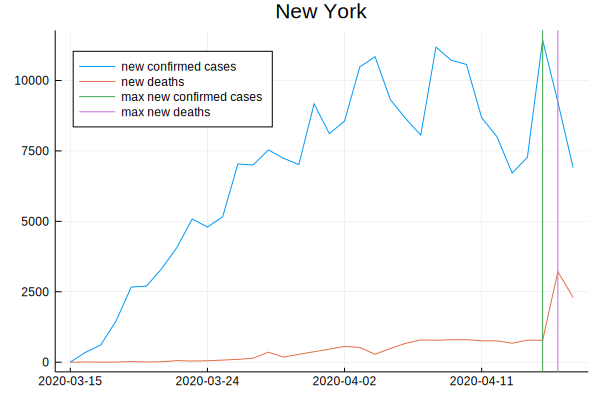

In [28]:
si = findfirst(x->x=="New York", states)
fi = findfirst(x->x==statereports.death1[si], datelist)
@time plot(datelist[fi+1:end], newcases(stateconfirm["New York"][fi:end]), title="New York", label="new confirmed cases", legend=:topleft, )
@time plot!(datelist[fi+1:end], newcases(statedeath["New York"][fi:end]), title="New York", label="new deaths")
vline!([statereports.maxnewconfirm[si]], label="max new confirmed cases")
vline!([statereports.maxnewdeath[si]], label="max new deaths")

In [29]:
statereports[49, :]

,state,confirm1,confirm2,confirm5,confirmlast,death1,death2,death5
,String,Date,Date,Date,Int64,Date,Date,Date
49,Texas,2020-03-05,2020-03-05,2020-03-07,17849,2020-03-17,2020-03-18,2020-03-19


In [30]:
Dates.value(statereports.confirm5[49] - statereports.confirm1[49])

2

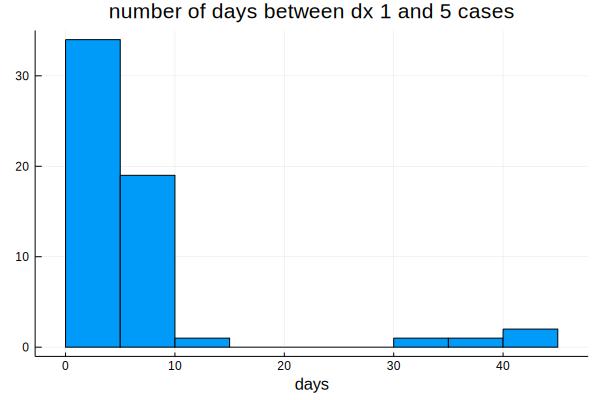

In [31]:
# some States have a big difference between first case and the next
histogram(Dates.value.(statereports.confirm5 - statereports.confirm1), legend=false, bins=15, xlabel="days", title="number of days between dx 1 and 5 cases")

In [32]:
# mean days for 1-5 increase in confirmed cases
mean(Dates.value.(statereports.confirm5 - statereports.confirm1))

5.931034482758621

In [33]:
# standard dev days for 1-5 increase in confirmed cases
std(Dates.value.(statereports.confirm5 - statereports.confirm1))

9.574934508438966

In [34]:
# kind of obvious from the plot, but just to check
skewness(Dates.value.(statereports.confirm5 - statereports.confirm1))

3.0272356722297884

## Global confirmed cases

In [35]:
@time globalconf = CSV.read("time_series_covid19_confirmed_global.csv")

  0.172289 seconds (274.03 k allocations: 14.025 MiB, 10.14% gc time)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20
,String⍰,String,Float64,Float64,Int64,Int64
1,missing,Afghanistan,33.0,65.0,0,0
2,missing,Albania,41.1533,20.1683,0,0
3,missing,Algeria,28.0339,1.6596,0,0
4,missing,Andorra,42.5063,1.5218,0,0
5,missing,Angola,-11.2027,17.8739,0,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0,0
7,missing,Argentina,-38.4161,-63.6167,0,0
8,missing,Armenia,40.0691,45.0382,0,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0,0


In [36]:
describe(globalconf)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Province/State,,Alberta,,Zhejiang,82,182,"Union{Missing, String}"
2,Country/Region,,Afghanistan,,Zimbabwe,185,,String
3,Lat,21.3173,-51.7963,23.4881,71.7069,,,Float64
4,Long,22.1683,-135.0,20.5356,178.065,,,Float64
5,1/22/20,2.10227,0,0.0,444,,,Int64
6,1/23/20,2.47727,0,0.0,444,,,Int64
7,1/24/20,3.56439,0,0.0,549,,,Int64
8,1/25/20,5.43182,0,0.0,761,,,Int64
9,1/26/20,8.02273,0,0.0,1058,,,Int64


In [37]:
filter(x->x[Symbol("Country/Region")]=="US", globalconf)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String⍰,String,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,missing,US,37.0902,-95.7129,1,1,2,2,5


In [38]:
gconfdaterange = 5:length(names(globalconf)[5:end]) + 5 -1

5:91

In [39]:
# create an Array of Date for xaxis plotting
@time gdatelist = Date.(string.(names(globalconf)[gconfdaterange]), "m/dd/yy") .+ Year(2000)

  0.001680 seconds (5.59 k allocations: 273.281 KiB)


87-element Array{Date,1}:
 2020-01-22
 2020-01-23
 2020-01-24
 2020-01-25
 2020-01-26
 2020-01-27
 2020-01-28
 2020-01-29
 2020-01-30
 2020-01-31
 2020-02-01
 2020-02-02
 2020-02-03
 2020-02-04
 2020-02-05
 2020-02-06
 2020-02-07
 2020-02-08
 2020-02-09
 2020-02-10
 2020-02-11
 2020-02-12
 2020-02-13
 2020-02-14
 2020-02-15
 2020-02-16
 2020-02-17
 2020-02-18
 2020-02-19
 2020-02-20
 2020-02-21
 2020-02-22
 2020-02-23
 2020-02-24
 ⋮
 2020-03-16
 2020-03-17
 2020-03-18
 2020-03-19
 2020-03-20
 2020-03-21
 2020-03-22
 2020-03-23
 2020-03-24
 2020-03-25
 2020-03-26
 2020-03-27
 2020-03-28
 2020-03-29
 2020-03-30
 2020-03-31
 2020-04-01
 2020-04-02
 2020-04-03
 2020-04-04
 2020-04-05
 2020-04-06
 2020-04-07
 2020-04-08
 2020-04-09
 2020-04-10
 2020-04-11
 2020-04-12
 2020-04-13
 2020-04-14
 2020-04-15
 2020-04-16
 2020-04-17

In [40]:
# Array of Country names as String
countries = unique(globalconf[:,Symbol("Country/Region")])

185-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 "Bangladesh"
 "Barbados"
 "Belarus"
 "Belgium"
 "Benin"
 "Bhutan"
 "Bolivia"
 "Bosnia and Herzegovina"
 "Brazil"
 "Brunei"
 "Bulgaria"
 "Burkina Faso"
 "Cabo Verde"
 "Cambodia"
 "Cameroon"
 "Canada"
 "Central African Republic"
 "Chad"
 "Chile"
 "China"
 "Colombia"
 ⋮
 "Ukraine"
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "US"
 "Uzbekistan"
 "Venezuela"
 "Vietnam"
 "Zambia"
 "Zimbabwe"
 "Dominica"
 "Grenada"
 "Mozambique"
 "Syria"
 "Timor-Leste"
 "Belize"
 "Laos"
 "Libya"
 "West Bank and Gaza"
 "Guinea-Bissau"
 "Mali"
 "Saint Kitts and Nevis"
 "Kosovo"
 "Burma"
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"
 "Malawi"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"

## Global death

In [41]:
@time globaldeath = CSV.read("time_series_covid19_deaths_global.csv")

  0.000903 seconds (1.01 k allocations: 521.758 KiB)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20
,String⍰,String,Float64,Float64,Int64,Int64
1,missing,Afghanistan,33.0,65.0,0,0
2,missing,Albania,41.1533,20.1683,0,0
3,missing,Algeria,28.0339,1.6596,0,0
4,missing,Andorra,42.5063,1.5218,0,0
5,missing,Angola,-11.2027,17.8739,0,0
6,missing,Antigua and Barbuda,17.0608,-61.7964,0,0
7,missing,Argentina,-38.4161,-63.6167,0,0
8,missing,Armenia,40.0691,45.0382,0,0
9,Australian Capital Territory,Australia,-35.4735,149.012,0,0


In [42]:
describe(globaldeath)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,Type
1,Province/State,,Alberta,,Zhejiang,82,182,"Union{Missing, String}"
2,Country/Region,,Afghanistan,,Zimbabwe,185,,String
3,Lat,21.3173,-51.7963,23.4881,71.7069,,,Float64
4,Long,22.1683,-135.0,20.5356,178.065,,,Float64
5,1/22/20,0.0643939,0,0.0,17,,,Int64
6,1/23/20,0.0681818,0,0.0,17,,,Int64
7,1/24/20,0.0984848,0,0.0,24,,,Int64
8,1/25/20,0.159091,0,0.0,40,,,Int64
9,1/26/20,0.212121,0,0.0,52,,,Int64


In [43]:
gdeathdaterange = 5:length(names(globaldeath)[5:end]) + 5 -1

5:91

In [44]:
# create a dataframe to organize statistics with country for each row
@time countryreports = DataFrame(country = countries)
countryconfirm = Dict{String, Vector{Int}}()
countrydeath = Dict{String, Vector{Int}}()
countryreports.confirm1 = fill(Date(1), length(countries))
countryreports.confirm2 = fill(Date(1), length(countries))
countryreports.confirm5 = fill(Date(1), length(countries))
countryreports.confirmlast = zeros(Int64, length(countries))
countryreports.death1 = fill(Date(1), length(countries))
countryreports.death2 = fill(Date(1), length(countries))
countryreports.death5 = fill(Date(1), length(countries))
countryreports.deathlast = zeros(Int64, length(countries))
countryreports.maxnewconfirm = fill(Date(1), length(countries))
countryreports.maxnewdeath = fill(Date(1), length(countries))


  0.045005 seconds (52.22 k allocations: 2.630 MiB, 39.05% gc time)


185-element Array{Date,1}:
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 ⋮
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01
 0001-01-01

In [45]:
groupby(globalconf, Symbol("Country/Region"))[176]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20
,String⍰,String,Float64,Float64,Int64,Int64,Int64,Int64,Int64
1,missing,Burma,21.9162,95.956,0,0,0,0,0


In [46]:
# populate countryreports and sum data for each country for each day
@time for (i, s) in enumerate(countries)
    countryconfirm[s] = sum.(eachcol(groupby(globalconf, Symbol("Country/Region"))[i][:, gconfdaterange]))
    countrydeath[s] = sum.(eachcol(groupby(globaldeath, Symbol("Country/Region"))[i][:, gdeathdaterange]))
    fd = findfirst(x->x>0, countryconfirm[s])
    if fd != nothing countryreports.confirm1[i] = datelist[fd]; end
    fd = findfirst(x->x>1, countryconfirm[s])
    if fd != nothing countryreports.confirm2[i] = datelist[fd]; end
    fd = findfirst(x->x>4, countryconfirm[s])
    if fd != nothing countryreports.confirm5[i] = datelist[fd]; end
    countryreports.confirmlast[i] = countryconfirm[s][end]
    fd = findfirst(x->x>0, countrydeath[s])
    if fd != nothing countryreports.death1[i] = datelist[fd]; end
    fd = findfirst(x->x>1, countrydeath[s])
    if fd != nothing countryreports.death2[i] = datelist[fd]; end
    fd = findfirst(x->x>4, countrydeath[s])
    if fd != nothing countryreports.death5[i] = datelist[fd]; end
    countryreports.deathlast[i] = countrydeath[s][end]
    a = newcases(countryconfirm[s])
    a1 = findfirst(x->x==maximum(a), a)
    countryreports.maxnewconfirm[i] = datelist[2:end][a1 + div(findlast(x->x==maximum(a), a) - a1, 2)]
    a = newcases(countrydeath[s])
    a1 = findfirst(x->x==maximum(a), a)
    countryreports.maxnewdeath[i] = datelist[2:end][a1 + div(findlast(x->x==maximum(a), a) - a1, 2)]
end

  0.145435 seconds (318.48 k allocations: 23.967 MiB)


In [47]:
countries

185-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Austria"
 "Azerbaijan"
 "Bahamas"
 "Bahrain"
 "Bangladesh"
 "Barbados"
 "Belarus"
 "Belgium"
 "Benin"
 "Bhutan"
 "Bolivia"
 "Bosnia and Herzegovina"
 "Brazil"
 "Brunei"
 "Bulgaria"
 "Burkina Faso"
 "Cabo Verde"
 "Cambodia"
 "Cameroon"
 "Canada"
 "Central African Republic"
 "Chad"
 "Chile"
 "China"
 "Colombia"
 ⋮
 "Ukraine"
 "United Arab Emirates"
 "United Kingdom"
 "Uruguay"
 "US"
 "Uzbekistan"
 "Venezuela"
 "Vietnam"
 "Zambia"
 "Zimbabwe"
 "Dominica"
 "Grenada"
 "Mozambique"
 "Syria"
 "Timor-Leste"
 "Belize"
 "Laos"
 "Libya"
 "West Bank and Gaza"
 "Guinea-Bissau"
 "Mali"
 "Saint Kitts and Nevis"
 "Kosovo"
 "Burma"
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"
 "Malawi"
 "South Sudan"
 "Western Sahara"
 "Sao Tome and Principe"
 "Yemen"

  0.000916 seconds (8.70 k allocations: 246.977 KiB)
  0.000781 seconds (1.63 k allocations: 97.805 KiB)


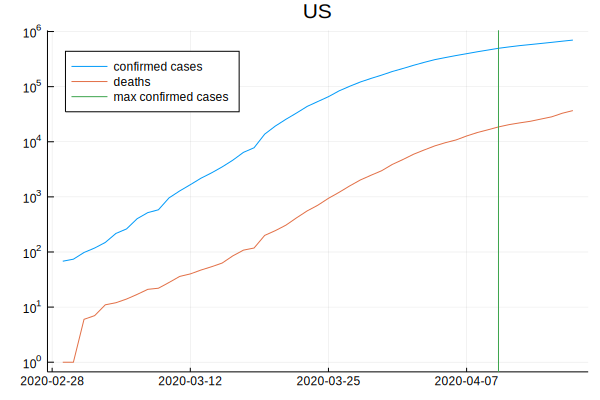

In [48]:
si = findfirst(x->x=="US", countries)
di = findfirst(x->x==countryreports.death1[si], gdatelist)
@time plot(gdatelist[di:end], countryconfirm["US"][di:end], title="US", label="confirmed cases", legend=:topleft, yaxis=:log)
@time plot!(gdatelist[di:end], countrydeath["US"][di:end], title="US", label="deaths")
vline!([countryreports.maxnewconfirm[si]], label="max confirmed cases")

  0.001031 seconds (8.71 k allocations: 248.617 KiB)
  0.000605 seconds (1.64 k allocations: 99.445 KiB)


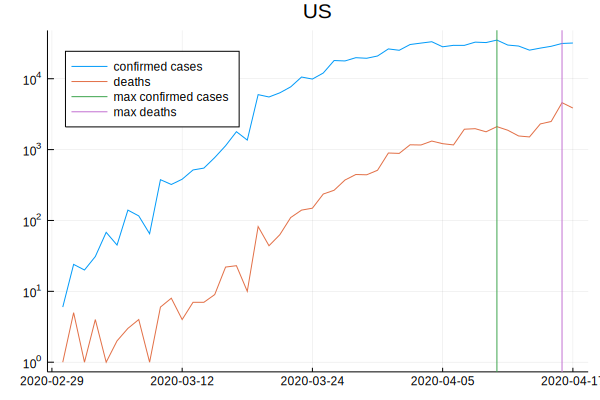

In [49]:
# log new cases plot starting with first death
si = findfirst(x->x=="US", countries)
di = findfirst(x->x==countryreports.death1[si], gdatelist)
@time plot(gdatelist[di+1:end], logprotect(newcases(countryconfirm["US"][di:end])), title="US", label="confirmed cases", legend=:topleft, yaxis=:log)
@time plot!(gdatelist[di+1:end], logprotect(newcases(countrydeath["US"][di:end])), title="US", label="deaths")
vline!([countryreports.maxnewconfirm[si]], label="max confirmed cases")
vline!([countryreports.maxnewdeath[si]], label="max deaths")

## US state reports

In [50]:
names(statereports)

12-element Array{Symbol,1}:
 :state
 :confirm1
 :confirm2
 :confirm5
 :confirmlast
 :death1
 :death2
 :death5
 :deathlast
 :pop
 :maxnewconfirm
 :maxnewdeath

In [51]:
# which States have most recent peak level of new death cases?
sort(statereports[:, [:state, :maxnewdeath]], :maxnewdeath, rev=true)

,state,maxnewdeath
,String,Date
1,Arizona,2020-04-17
2,Michigan,2020-04-17
3,Minnesota,2020-04-17
4,New Mexico,2020-04-17
5,North Carolina,2020-04-17
6,Rhode Island,2020-04-17
7,West Virginia,2020-04-17
8,California,2020-04-16
9,New York,2020-04-16


In [52]:
# which States are still close to peak level of new confirmed cases?
sort(statereports[:, [:state, :maxnewconfirm]], :maxnewconfirm, rev=true)

,state,maxnewconfirm
,String,Date
1,Delaware,2020-04-17
2,Georgia,2020-04-17
3,Indiana,2020-04-17
4,Iowa,2020-04-17
5,Minnesota,2020-04-17
6,Nebraska,2020-04-17
7,Nevada,2020-04-17
8,North Carolina,2020-04-17
9,Ohio,2020-04-17


In [53]:
# which States have had the most deaths?
sort(statereports[:, [:state, :deathlast]], :deathlast, rev=true)

,state,deathlast
,String,Int64
1,New York,17131
2,New Jersey,3840
3,Michigan,2227
4,Massachusetts,1245
5,Louisiana,1213
6,Illinois,1132
7,California,1037
8,Connecticut,1036
9,Pennsylvania,921


In [54]:
statereports.deathlast./statereports.pop * 100000

58-element Array{Float64,1}:
   0.0
   3.0445292853271955
   3.626867836936022
   1.9772223979753243
   1.8644889435805645
   3.0184461732526917
   1.2302729155417642
   2.321837763441002
   1.2260570931710608
   2.624504321105902
   6.459750889778591
  29.057969246234595
   6.264351526653276
  12.185635402954876
   3.3755884057989913
   6.122012846243387
   0.6356506802874836
   2.294264618242761
   8.933206995269268
   7.753758456164304
   2.028481143049124
   2.8146639874726858
   3.066473307245181
  26.092788796406122
   2.1573977914198057
   5.524605999655953
  18.063104216276727
  22.29930798047874
   1.9682135288259943
   4.704065555857587
   2.776783853484811
   0.7485184013892502
   1.240689658024574
   4.610156108976299
   2.7211664831717917
  43.23258115397216
   2.098406689338997
  72.50276313358711
   1.6876295041115232
   1.1810062698310637
   3.575981042167489
   3.436972371038352
   1.659657773825158
   7.19419458960635
  11.138790270738681
   2.25298977569933
   0.7912

In [55]:
# slightly different if we factor in population (deaths per 100,000)
ds = statereports.deathlast./statereports.pop * 100000
@time sortslices(hcat(statereports.state, ds), dims=1, lt=(x,y)->isless(x[2],y[2]), rev=true)

  0.926103 seconds (2.84 M allocations: 145.015 MiB, 5.70% gc time)


58×2 Array{Any,2}:
 "Diamond Princess"          NaN
 "Grand Princess"            NaN
 "New York"                   72.5028
 "New Jersey"                 43.2326
 "Connecticut"                29.058
 "Louisiana"                  26.0928
 "Michigan"                   22.2993
 "Massachusetts"              18.0631
 "District of Columbia"       12.1856
 "Rhode Island"               11.1388
 "Illinois"                    8.93321
 "Washington"                  7.91869
 "Indiana"                     7.75376
 "Pennsylvania"                7.19419
 "Colorado"                    6.45975
 "Delaware"                    6.26435
 "Georgia"                     6.12201
 "Vermont"                     5.60907
 "Maryland"                    5.52461
 "Mississippi"                 4.70407
 "Nevada"                      4.61016
 "Northern Mariana Islands"    3.62687
 "Ohio"                        3.57598
 "Wisconsin"                   3.53804
 "Oklahoma"                    3.43697
 "Florida"                 

In [56]:
# for total US current death rate per 100,000
sum(statereports.deathlast)/sum(statereports.pop) * 100000

10.93722757683943

## plot confirmed

  0.205655 seconds (865.71 k allocations: 35.499 MiB)
  0.350493 seconds (296.41 k allocations: 15.322 MiB)


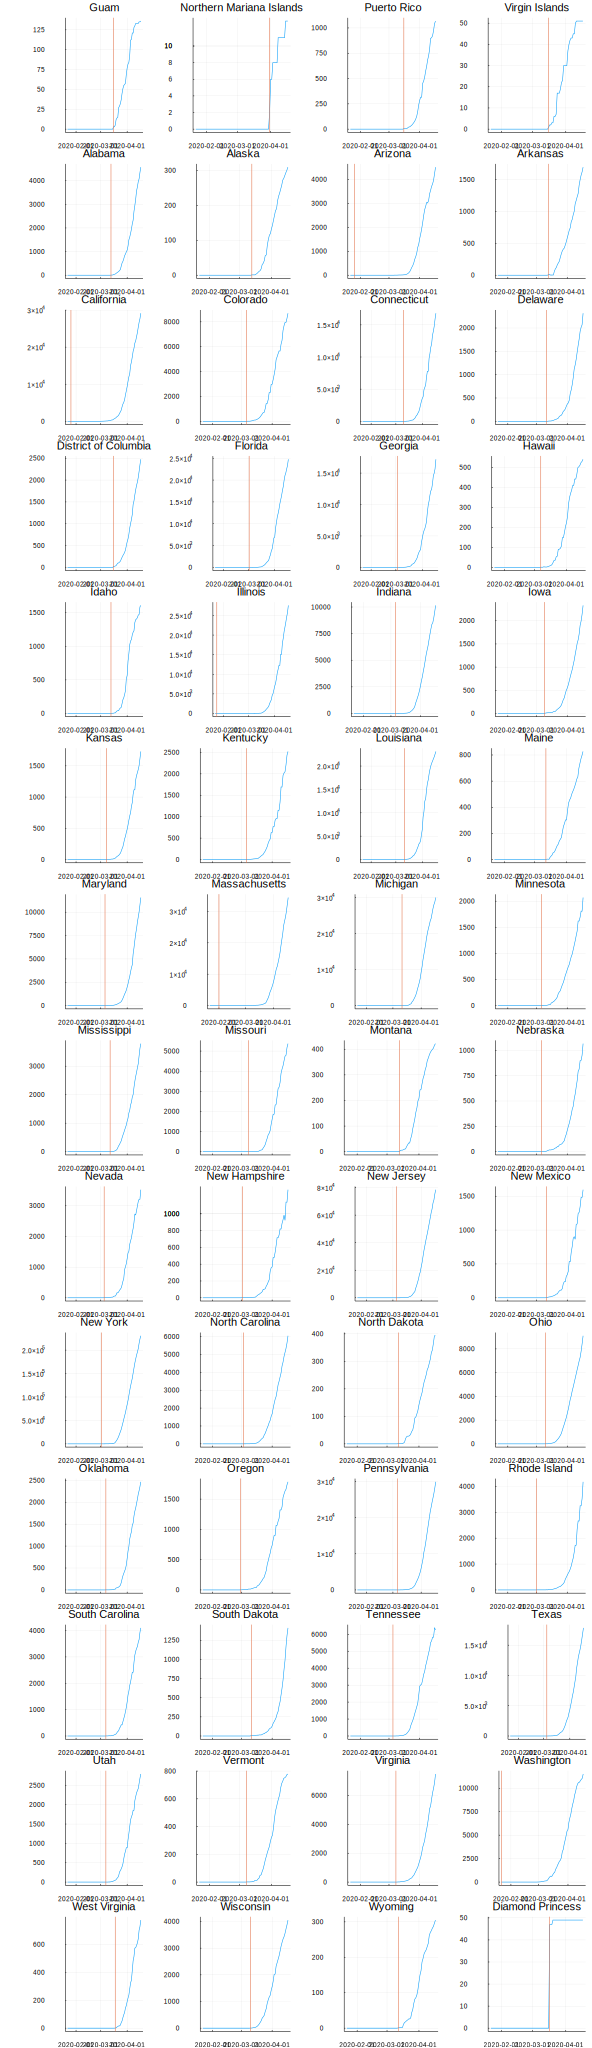

In [57]:
# raw plot with date of first confirmed diagnosis
p = []
@time for i = 2:57
    pi = plot(datelist, stateconfirm[states[i]], title=states[i], legend=false)
    pi = vline!([statereports.confirm1[i]])
    push!(p, pi)
end
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

  0.134926 seconds (660.25 k allocations: 23.023 MiB, 16.66% gc time)
  0.746736 seconds (491.39 k allocations: 24.689 MiB)


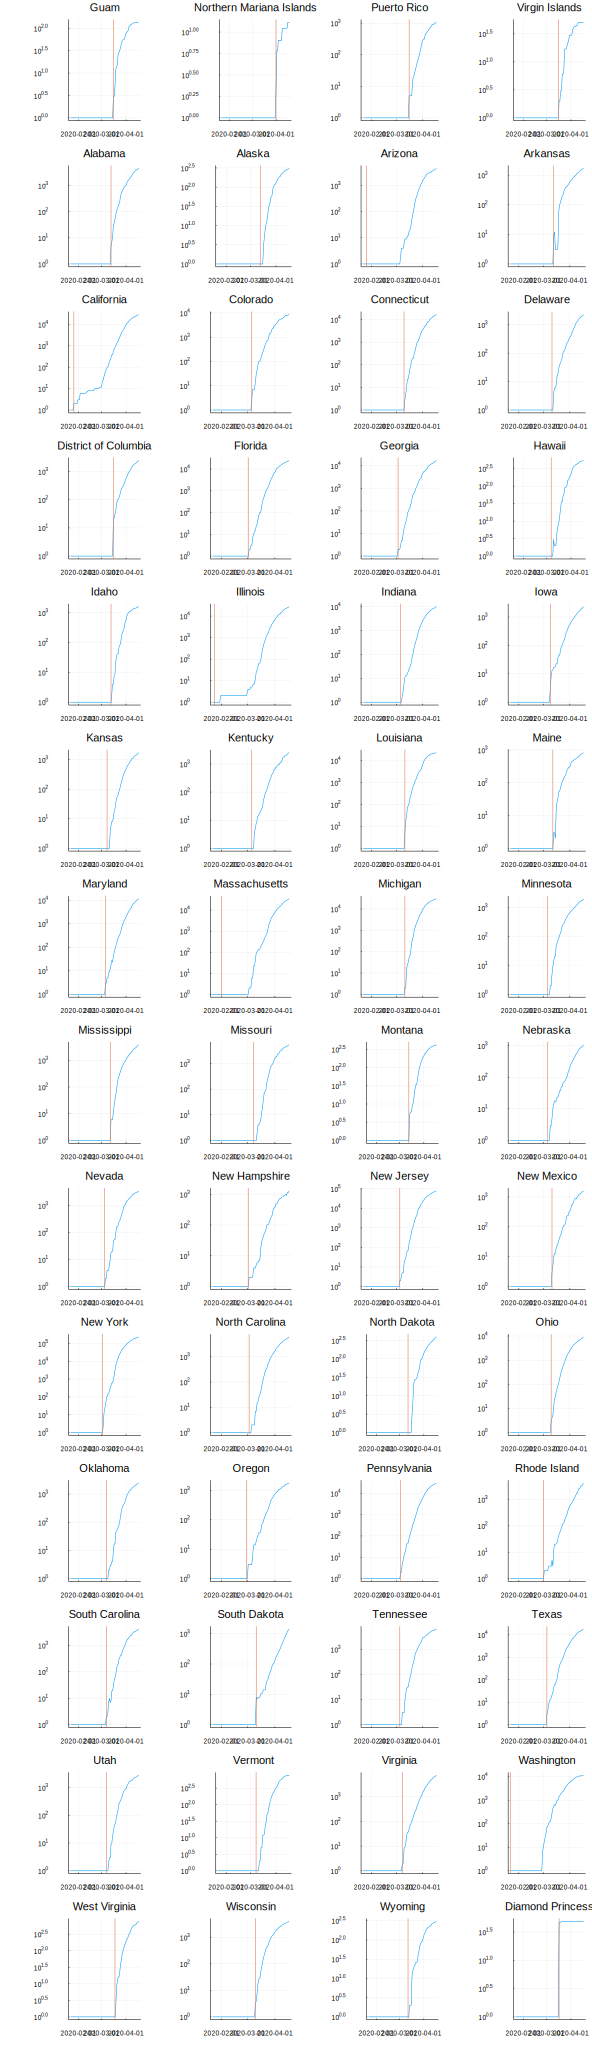

In [58]:
# raw plot is hard to see rate, so let's log scale it to see if we are "flattening the curve"
p = []
@time for i = 2:57
    pi = plot(datelist, logprotect(stateconfirm[states[i]]), title=states[i], legend=false, yaxis=:log)
    pi = vline!([statereports.confirm1[i]])
    push!(p, pi)
end
@time savefig(plot(p..., size=(3000,2400), layout=(7,8), left_margin=50px), "allconfirm.png")
plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

## new confirm

  0.070870 seconds (597.86 k allocations: 19.978 MiB)
  0.006071 seconds (28.85 k allocations: 2.271 MiB)


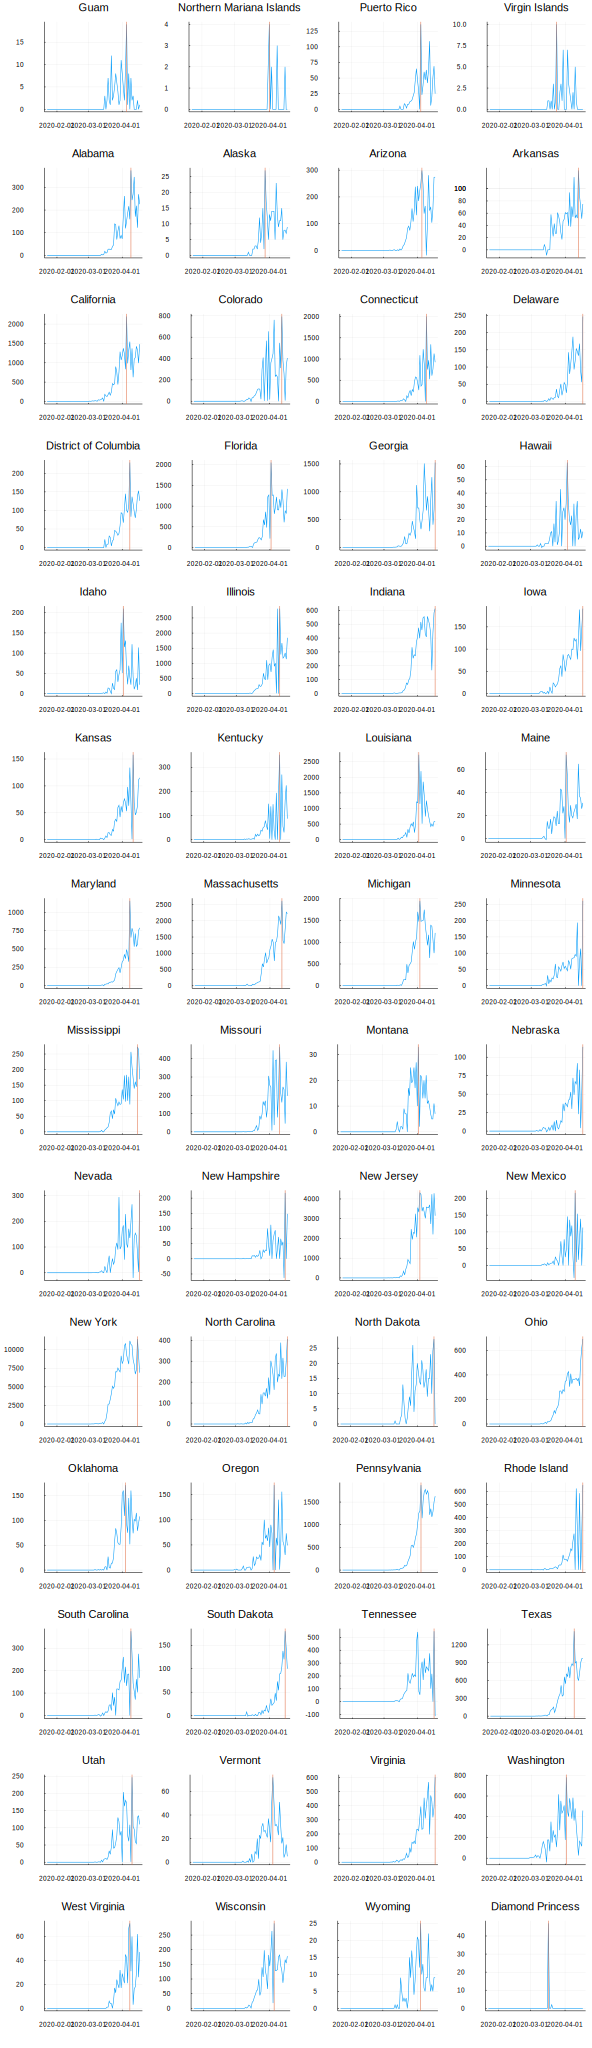

In [59]:
# I think it is a lot easier to see if we plot newcases to see if heading back down to zero
p = []
@time for i = 2:57
    pi = plot(datelist[2:end], newcases(stateconfirm[states[i]]), title=states[i], legend=false)
    pi = vline!([statereports.maxnewconfirm[i]])
    push!(p, pi)
end
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

  0.410586 seconds (1.32 M allocations: 53.997 MiB, 4.48% gc time)
  0.667742 seconds (377.32 k allocations: 19.211 MiB)
  0.006241 seconds (28.51 k allocations: 1.766 MiB)


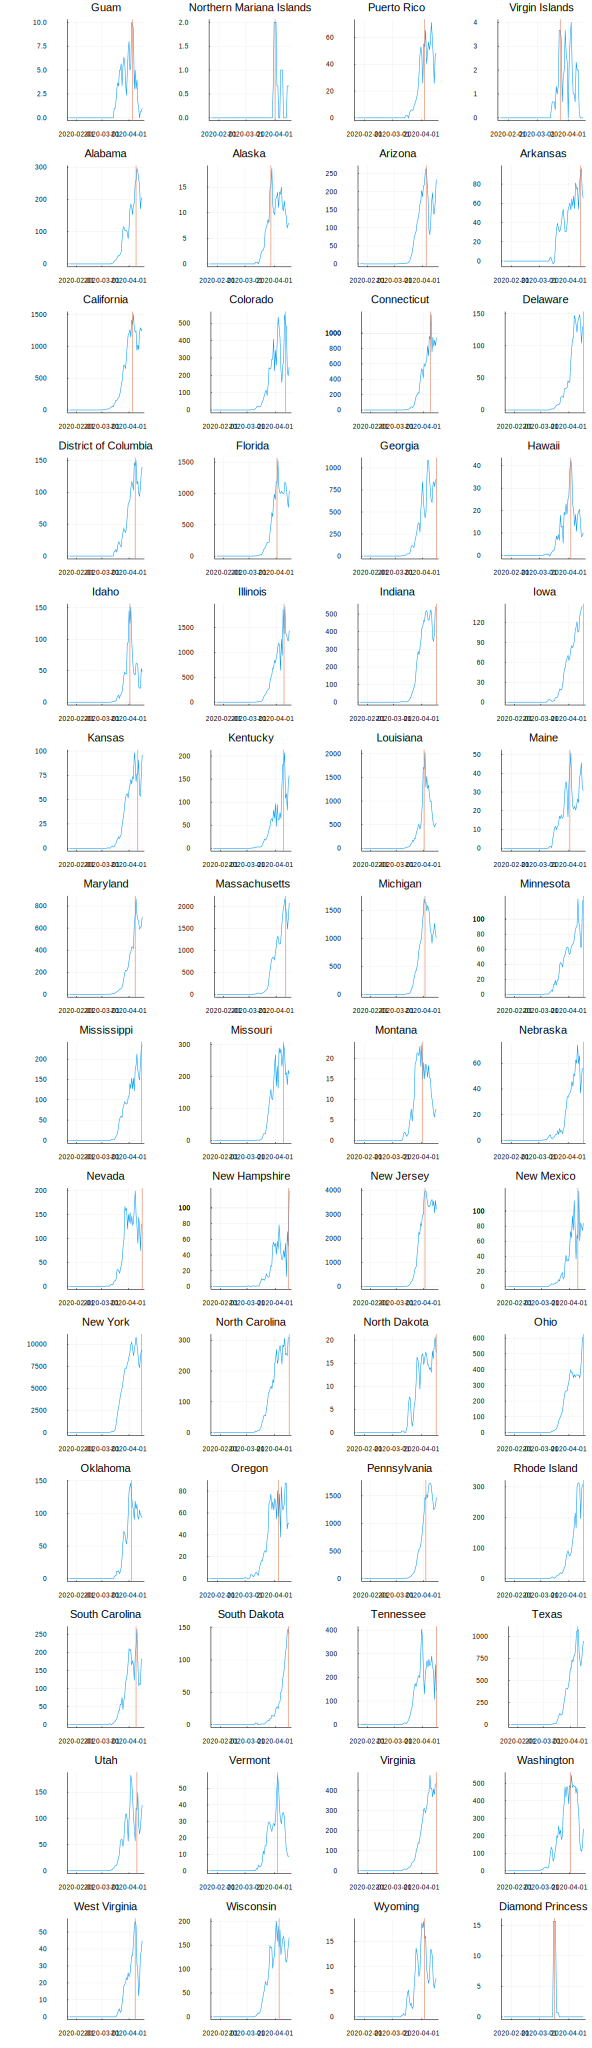

In [60]:
# daily newcasesis pretty jagged, so let's smooth a little
p = []
@time for i = 2:57
    pi = plot(datelist[3:end-1], smooth(newcases(stateconfirm[states[i]]),3), title=states[i], legend=false)
    pi = vline!([statereports.maxnewconfirm[i]])
    push!(p, pi)
end
@time savefig(plot(p..., size=(3000,2400), layout=(7,8), left_margin=50px), "allnewconfirm.png")
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

## new death

  0.073504 seconds (597.86 k allocations: 19.978 MiB)
  0.006432 seconds (28.85 k allocations: 2.271 MiB)


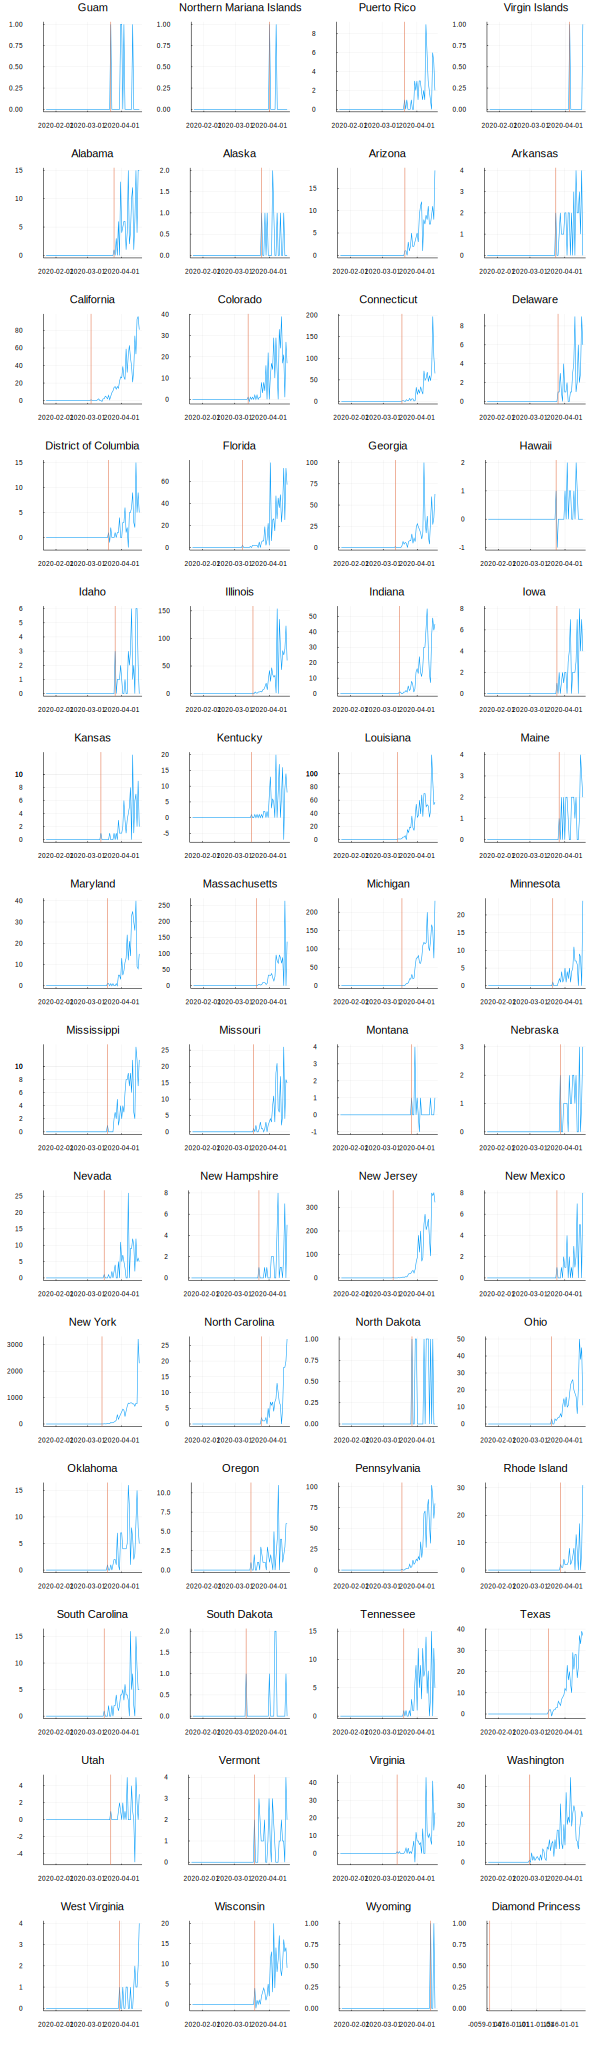

In [61]:
# plot newcases with death1
p = []
@time for i = 2:57
    pi = plot(datelist[2:end], newcases(statedeath[states[i]]), title=states[i], legend=false)
    pi = vline!([statereports.death1[i]])
    push!(p, pi)
end
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

  0.078705 seconds (602.96 k allocations: 20.601 MiB)
  0.667007 seconds (380.24 k allocations: 19.359 MiB, 2.77% gc time)
  0.006266 seconds (28.51 k allocations: 1.766 MiB)


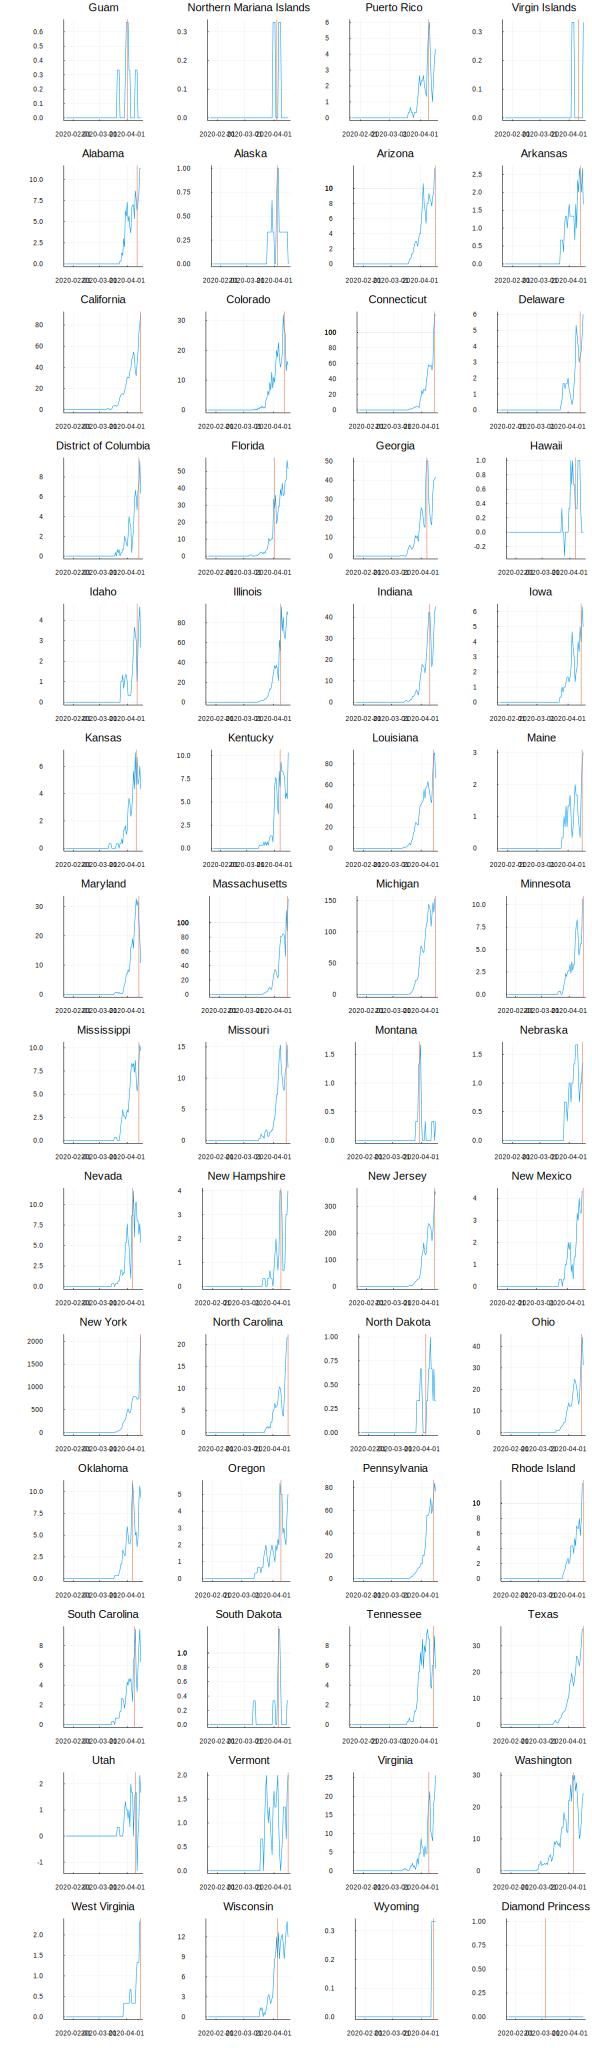

In [62]:
# smooth newcases death
p = []
@time for i = 2:57
    pi = plot(datelist[3:end-1], smooth(newcases(statedeath[states[i]]),3), title=states[i], legend=false)
    pi = vline!([statereports.maxnewdeath[i]])
    push!(p, pi)
end
@time savefig(plot(p..., size=(3000,2400), layout=(7,8), left_margin=50px), "allnewdeath.png")
@time plot(p..., size=(1100,3800), layout=(14,4), left_margin=50px)

## confirm + death plot

In [63]:
states[57]

"Diamond Princess"

  0.274753 seconds (1.29 M allocations: 54.367 MiB, 8.38% gc time)
  0.027091 seconds (52.26 k allocations: 3.972 MiB)


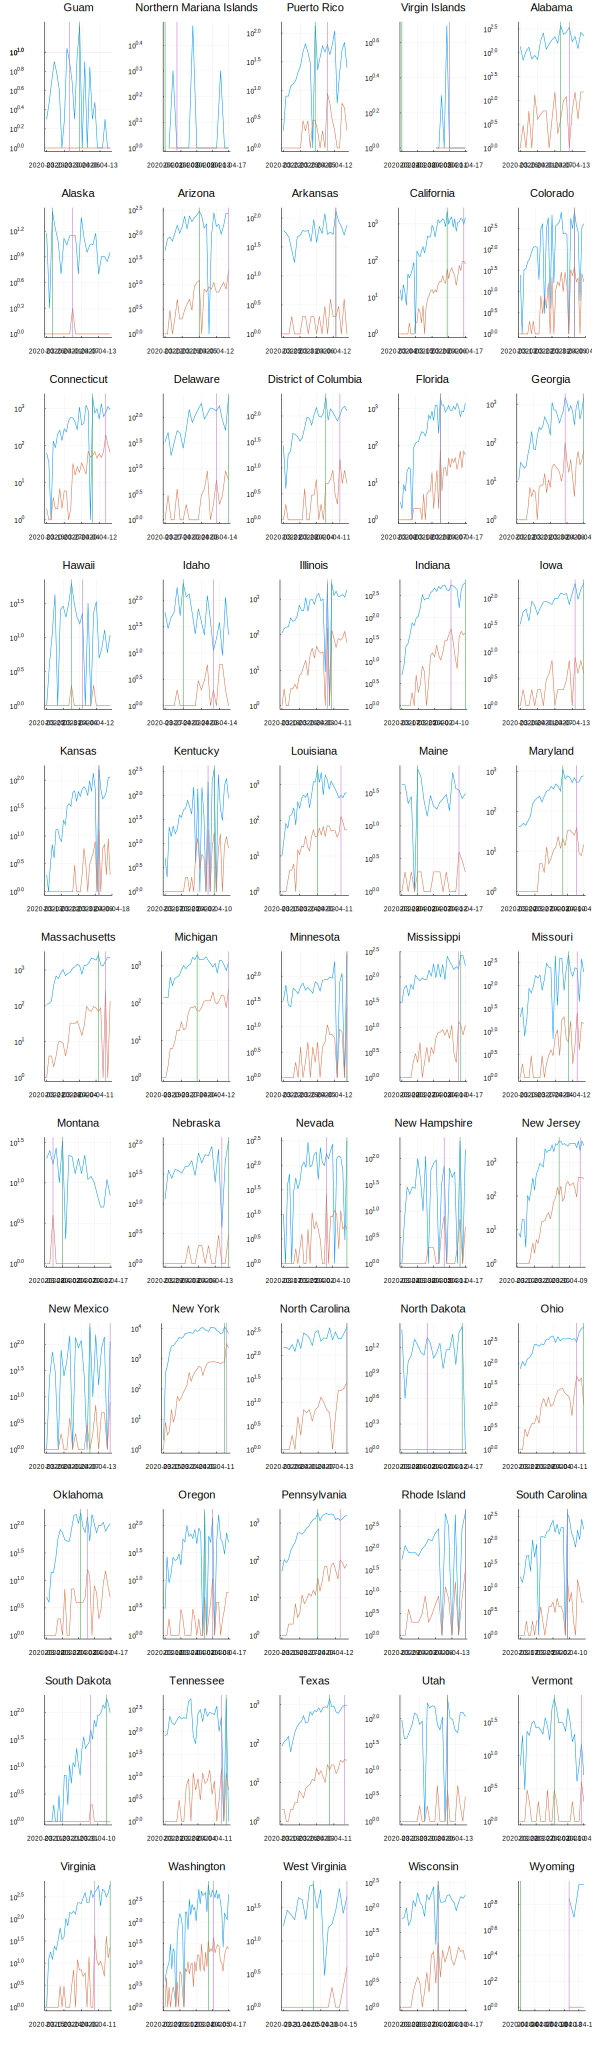

In [64]:
# log new cases plot starting with first death
p = []
@time for i = 2:56
    di = findfirst(x->x==statereports.death1[i], datelist)
    pi = plot(datelist[di+1:end], logprotect(newcases(stateconfirm[states[i]][di:end])), title=states[i], label="new confirmed cases", legend=false, yaxis=:log)
    plot!(pi, datelist[di+1:end], logprotect(newcases(statedeath[states[i]][di:end])), title=states[i], label="new deaths")
    vline!(pi, [statereports.maxnewconfirm[i]], label="max new confirmed cases")
    vline!(pi, [statereports.maxnewdeath[i]], label="max new deaths")
    push!(p, pi)
end
@time plot(p..., size=(1100,3800), layout=(11,5), left_margin=50px)

## single plot

In [65]:
chosen = ["California", "New York", "Florida", "Montana", "Washington", "Illinois", "Michigan", "Texas"]

8-element Array{String,1}:
 "California"
 "New York"
 "Florida"
 "Montana"
 "Washington"
 "Illinois"
 "Michigan"
 "Texas"

In [66]:
@time ci = [findfirst(x->x==s, states) for s in chosen]

  0.063351 seconds (104.73 k allocations: 5.265 MiB)


8-element Array{Int64,1}:
 10
 38
 15
 32
 53
 19
 28
 49

In [67]:
@time mi = findmin(map(x->statereports.confirm5[x], ci))

  0.109815 seconds (249.01 k allocations: 12.799 MiB)


(2020-02-03, 1)

In [68]:
@time start = ci[mi[2]]

  0.000010 seconds


10

  0.051768 seconds (88.43 k allocations: 4.429 MiB)


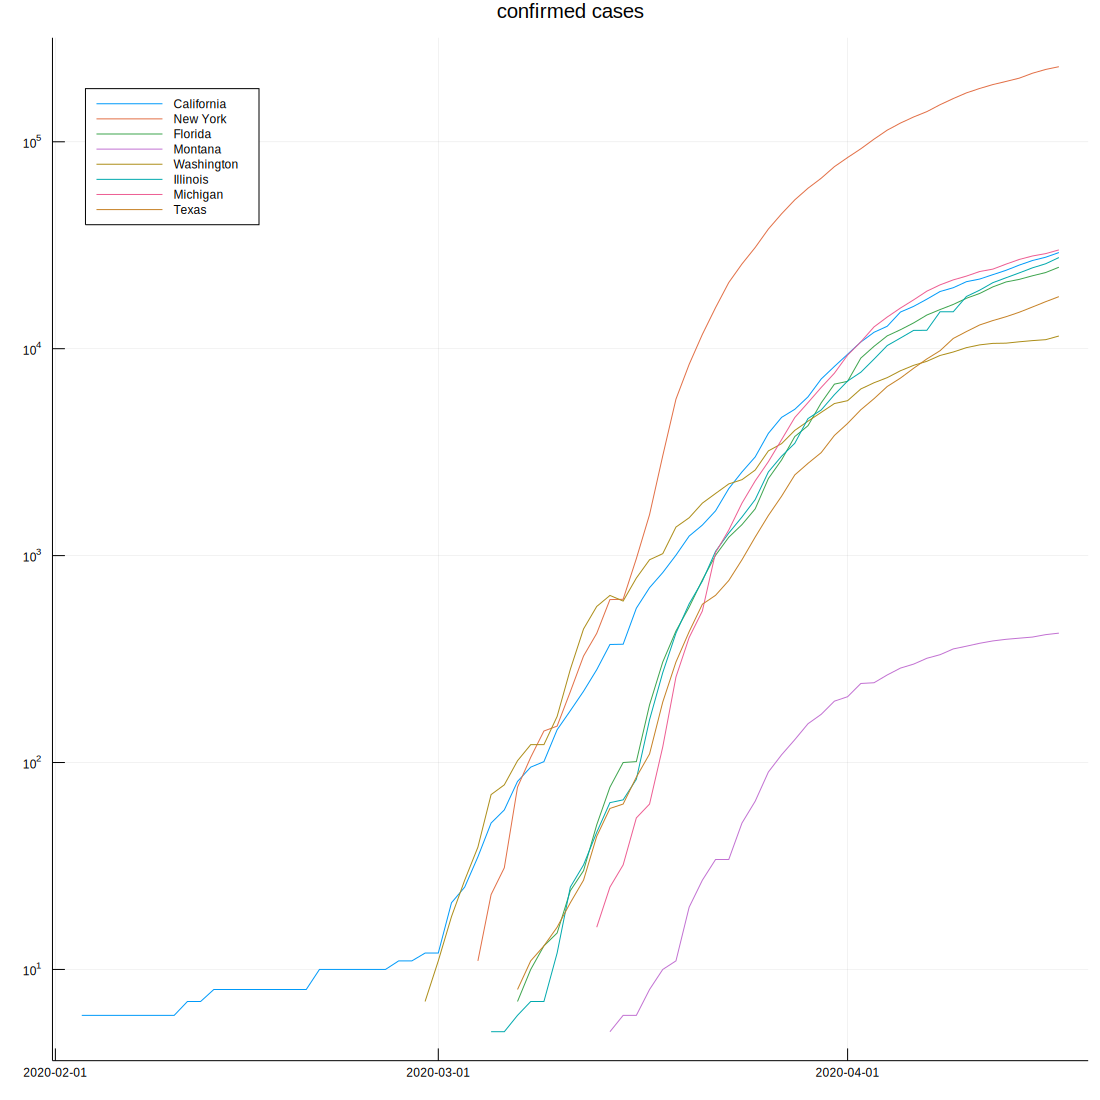

In [69]:
# log plot select confirmed cases
si = findfirst(x->x==statereports.confirm5[start], datelist)
p = plot(datelist[si:end], logprotect(stateconfirm[states[start]][si:end]), label=states[start], yaxis=:log,
    legend=:topleft, size=(1100,1100), title="confirmed cases")
@time for i in vcat(ci[1:mi[2]-1], ci[mi[2]+1:end])
    si = findfirst(x->x==statereports.confirm5[i], datelist)
    plot!(p, datelist[si:end], logprotect(stateconfirm[states[i]][si:end]), label=states[i])
end
savefig(p, "selectconfirm.png")
p

  0.003166 seconds (12.04 k allocations: 785.742 KiB)


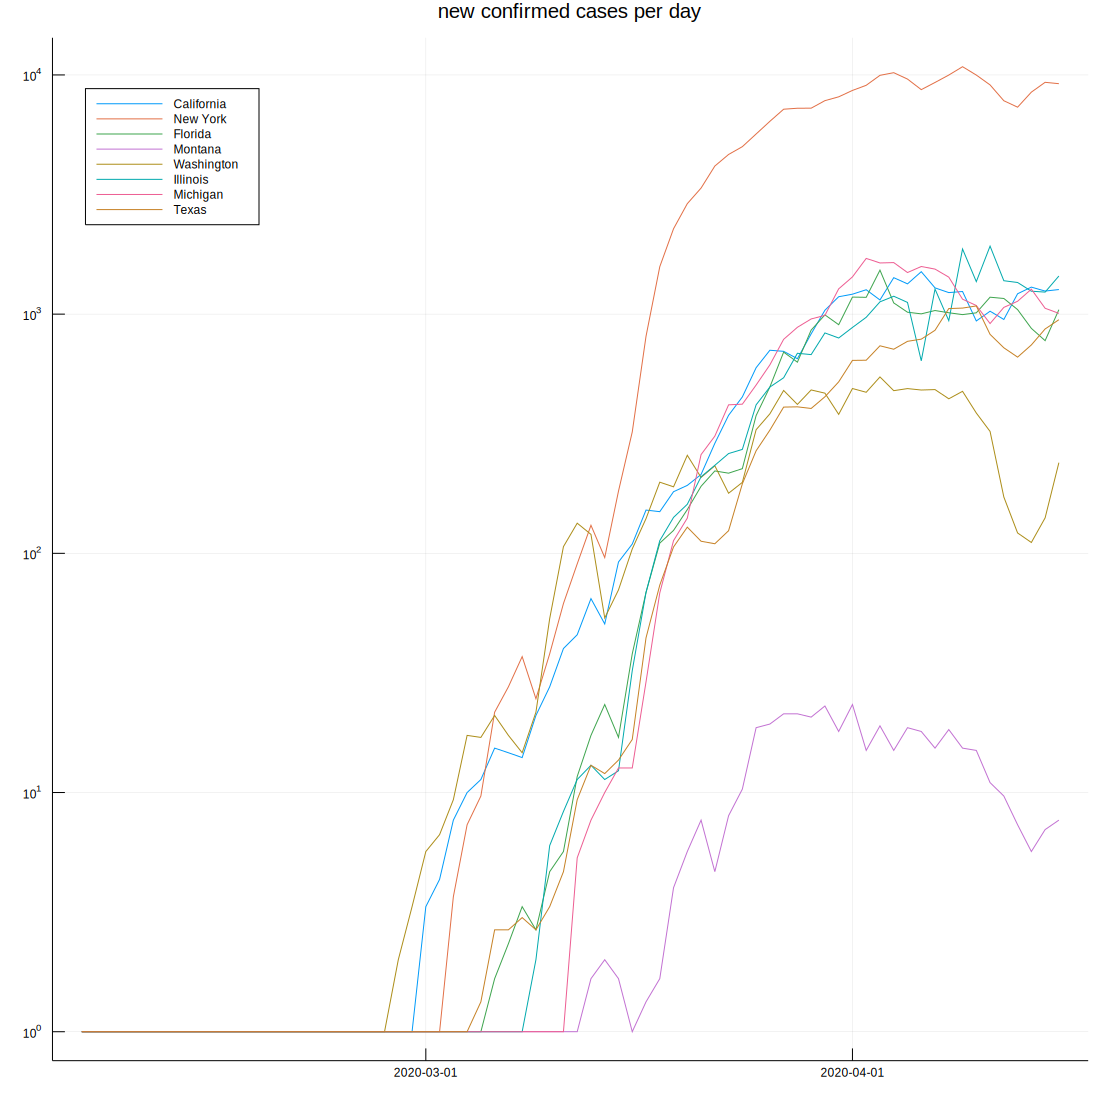

In [70]:
# plot select new cases
si = findfirst(x->x==statereports.confirm5[start], datelist)
p = plot(datelist[si+2:end-1], logprotect(smooth(newcases(stateconfirm[states[start]]), 3)[si:end]), label=states[start], yaxis=:log,
    legend=:topleft, size=(1100,1100), title="new confirmed cases per day")
@time for i in vcat(ci[1:mi[2]-1], ci[mi[2]+1:end])
    plot!(p, datelist[si+2:end-1], logprotect(smooth(newcases(stateconfirm[states[i]]), 3)[si:end]), label=states[i])
end
savefig(p, "selectnewconfirm.png")
p

  0.003011 seconds (12.04 k allocations: 785.742 KiB)


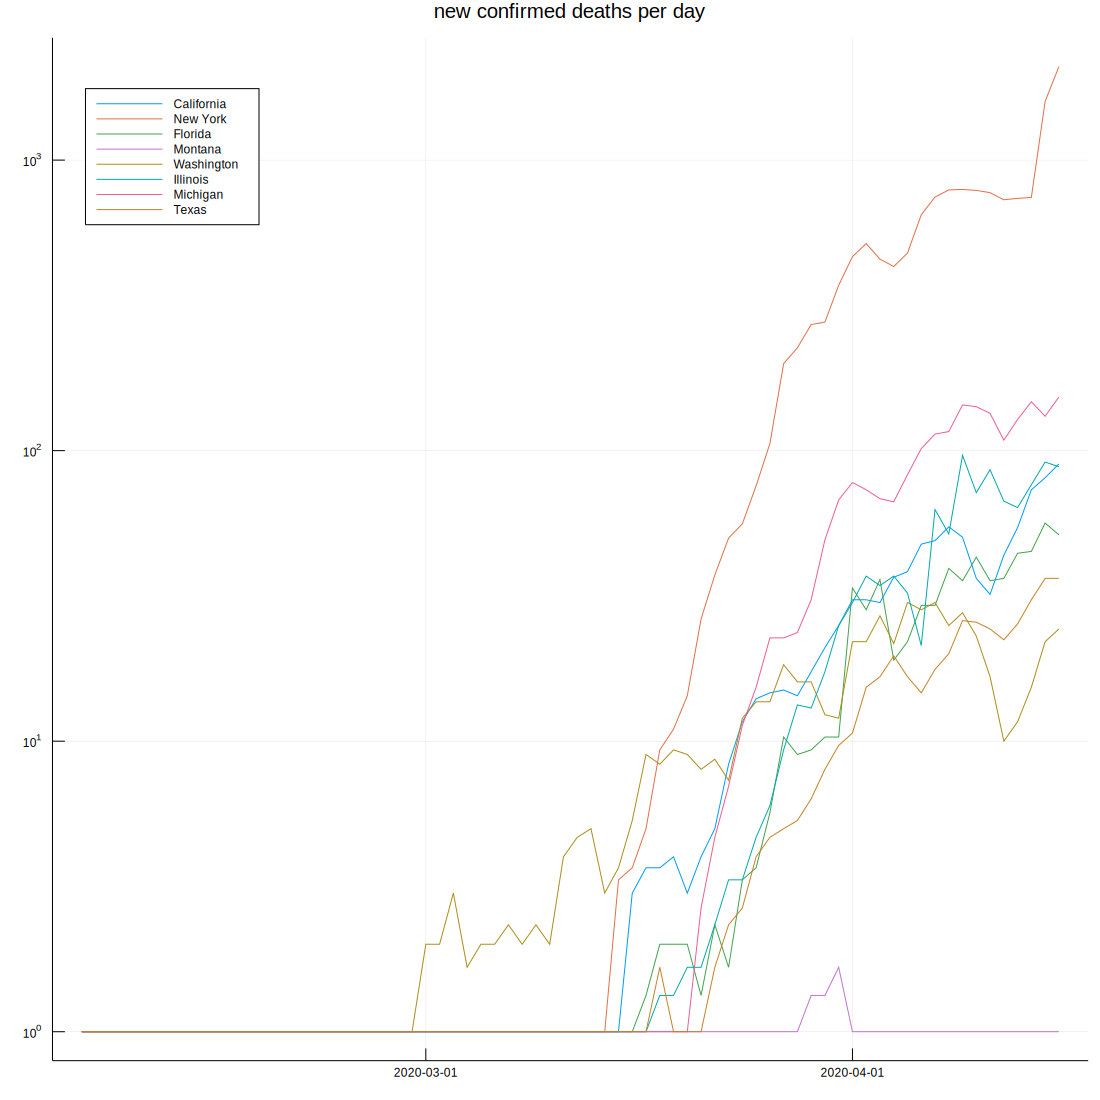

In [71]:
# plot select new deaths
si = findfirst(x->x==statereports.confirm5[start], datelist)
p = plot(datelist[si+2:end-1], logprotect(smooth(newcases(statedeath[states[start]]), 3)[si:end]), label=states[start], yaxis=:log,
    legend=:topleft, size=(1100,1100), title="new confirmed deaths per day")
@time for i in vcat(ci[1:mi[2]-1], ci[mi[2]+1:end])
    plot!(p, datelist[si+2:end-1], logprotect(smooth(newcases(statedeath[states[i]]), 3)[si:end]), label=states[i])
end
savefig(p, "selectnewdeath.png")
p